In [1]:
import warnings
import numpy as np
import pandas as pd
import scipy.stats as st
import statsmodels as sm
import matplotlib
import matplotlib.pyplot as plt

In [21]:
disciplinas = ['CÁLCULO I','CÁLCULO II','CÁLCULO III','VETORES E GEOMETRIA ANALÍTICA','PRÉ-CÁLCULO','PROBABILIDADE E ESTATÍSTICA',
               'INTRODUÇÃO À FÍSICA CLÁSSICA I','INTRODUÇÃO À FÍSICA CLÁSSICA II','INTRODUÇÃO À FÍSICA CLÁSSICA III','LÓGICA DE PROGRAMAÇÃO',
               'LINGUAGEM DE PROGRAMAÇÃO','COMPUTAÇÃO NUMÉRICA','QUÍMICA GERAL','ÁLGEBRA LINEAR','MECÂNICA DOS SÓLIDOS','MECÂNICA DOS FLUIDOS',
               'CIÊNCIA E TECNOLOGIA DOS MATERIAIS']

In [32]:
df[df['nome']=='CÁLCULO I'].shape

(4274, 4)

In [3]:
colunas = ['discente', 'id_turma', 'media_final', 'nome']
df = pd.read_csv('../data_science/turmas_new.csv')
df = df[colunas].drop_duplicates()

# cont = 0;
# for disciplina in disciplinas:
#     serie = df[df['nome'] == disciplina].media_final
#     plota(serie, cont)
#     cont+=1

In [35]:
def best_fit_distribution(data, bins=700, ax=None):
    y, x = np.histogram(data, bins=bins, density=True)
    x = (x + np.roll(x, -1))[:-1] / 2.0
    # DISTRIBUTIONS = [        
    #     st.alpha,st.anglit,st.arcsine,st.beta,st.betaprime,st.bradford,st.burr,st.cauchy,st.chi,st.chi2,st.cosine,
    #     st.dgamma,st.dweibull,st.erlang,st.expon,st.exponnorm,st.exponweib,st.exponpow,st.f,st.fatiguelife,st.fisk,
    #     st.foldcauchy,st.foldnorm,st.frechet_r,st.frechet_l,st.genlogistic,st.genpareto,st.gennorm,st.genexpon,
    #     st.genextreme,st.gausshyper,st.gamma,st.gengamma,st.genhalflogistic,st.gilbrat,st.gompertz,st.gumbel_r,
    #     st.gumbel_l,st.halfcauchy,st.halflogistic,st.halfnorm,st.halfgennorm,st.hypsecant,st.invgamma,st.invgauss,
    #     st.invweibull,st.johnsonsb,st.johnsonsu,st.ksone,st.kstwobign,st.laplace,st.levy,st.levy_l,st.levy_stable,
    #     st.logistic,st.loggamma,st.loglaplace,st.lognorm,st.lomax,st.maxwell,st.mielke,st.nakagami,st.ncx2,st.ncf,
    #     st.nct,st.norm,st.pareto,st.pearson3,st.powerlaw,st.powerlognorm,st.powernorm,st.rdist,st.reciprocal,
    #     st.rayleigh,st.rice,st.recipinvgauss,st.semicircular,st.t,st.triang,st.truncexpon,st.truncnorm,st.tukeylambda,
    #     st.uniform,st.vonmises,st.vonmises_line,st.wald,st.weibull_min,st.weibull_max,st.wrapcauchy
    # ]
    # Escolhe as distribuicoes
    DISTRIBUTIONS=[
        st.norm,st.t,st.expon,st.bernoulli,st.gamma
    ]

    best_distribution = st.norm
    best_params = (0.0, 1.0)
    best_sse = np.inf
    for distribution in DISTRIBUTIONS:
        try:
            with warnings.catch_warnings():
                warnings.filterwarnings('ignore')

                params = distribution.fit(data)

                arg = params[:-2]
                loc = params[-2]
                scale = params[-1]

                pdf = distribution.pdf(x, loc=loc, scale=scale, *arg)
                sse = np.sum(np.power(y - pdf, 2.0))

                try:
                    if ax:
                        pd.Series(pdf, x).plot(ax=ax)
                except Exception:
                    pass

                if best_sse > sse > 0:
                    best_distribution = distribution
                    best_params = params
                    best_sse = sse

        except Exception:
            pass

    return (best_distribution.name, best_params)

def make_pdf(dist, params, size=1000):
    arg = params[:-2]
    loc = params[-2]
    scale = params[-1]

    start = dist.ppf(0.01, *arg, loc=loc, scale=scale) if arg else dist.ppf(0.01, loc=loc, scale=scale)
    end = dist.ppf(0.99, *arg, loc=loc, scale=scale) if arg else dist.ppf(0.99, loc=loc, scale=scale)

    x = np.linspace(start, end, size)
    y = dist.pdf(x, loc=loc, scale=scale, *arg)
    pdf = pd.Series(y, x)

    return pdf

def plota(serie, cont):
    # Dados das notas
    notas = pd.Series(serie)
    # notas = pd.Series(sm.datasets.elnino.load_pandas().data.set_index('YEAR').values.ravel())
    # Plota histograma
    notas.plot.hist(bins=50,normed=True)
    # Calcula melhor distribuicao
    best_fit_name, best_fir_paramms = best_fit_distribution(notas, 200)
    best_dist = getattr(st, best_fit_name)
    # Cria curva da distribuicao
    pdf= make_pdf(best_dist,best_fir_paramms)
    # Plota melhor distribuicao
    param_names = (best_dist.shapes + ', loc, scale').split(', ') if best_dist.shapes else ['loc', 'scale']
    param_str = ', '.join(['{}={:0.2f}'.format(k,v) for k,v in zip(param_names, best_fir_paramms)])
    dist_str = '{}({})'.format(best_fit_name, param_str)
    plt.title(u'Melhor distribuicao \n' + dist_str)
    plt.xlabel(u'Notas')
    plt.ylabel('Frequencia')
    pdf.plot().get_figure().savefig('teste'+str(cont)+'.png')

    plt.show()

[[0.32858901]]
[[0.40333372]]
[[0.38856226]]
[[0.3035193]]
[[0.32539579]]
[[0.35161322]]
[[0.35887124]]
[[0.35456348]]
[[0.44552772]]
[[0.48983467]]
[[0.46129174]]
[[0.37211435]]
[[0.28442392]]
[[0.41405545]]
[[0.36077341]]
[[0.41018624]]
[[0.30393996]]


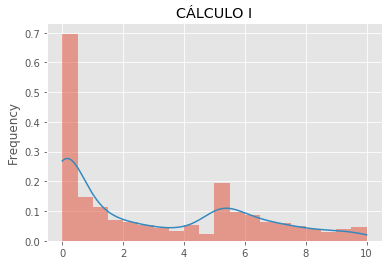

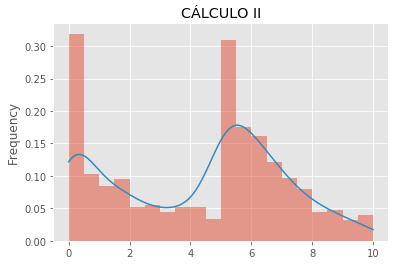

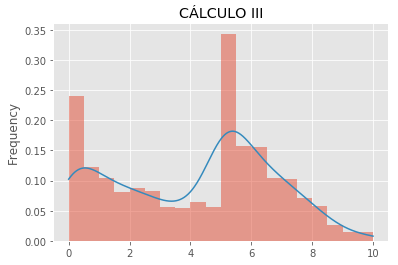

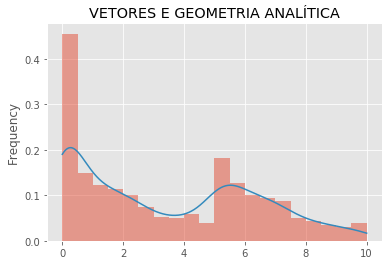

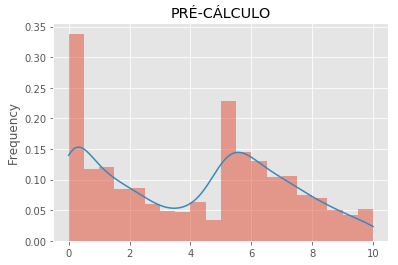

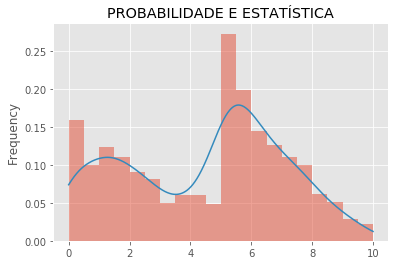

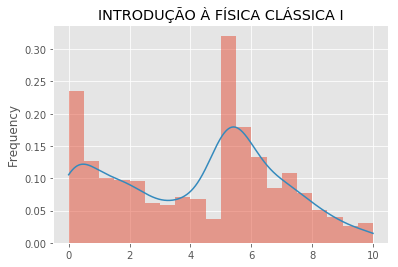

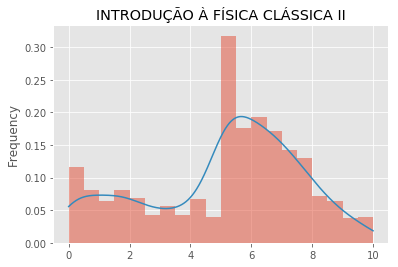

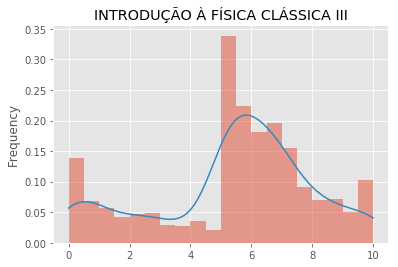

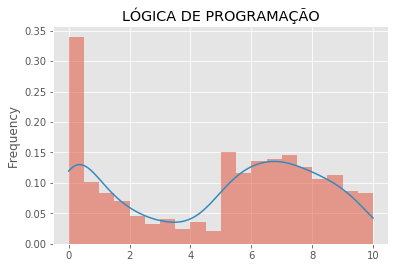

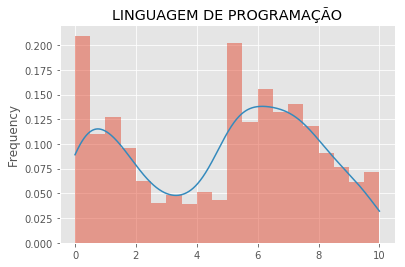

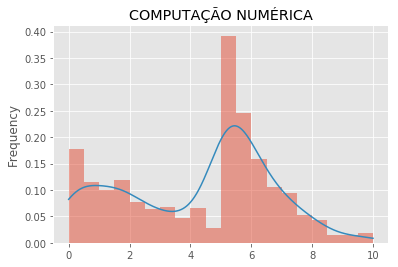

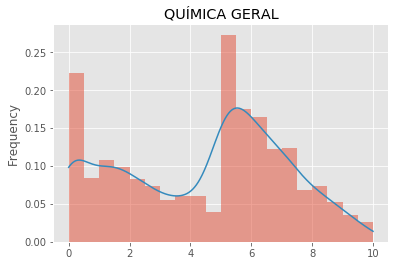

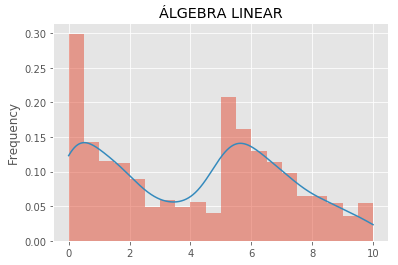

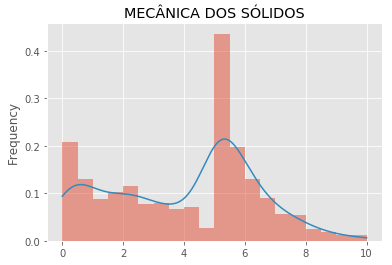

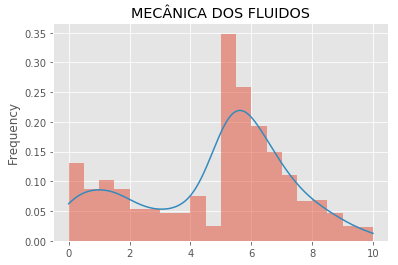

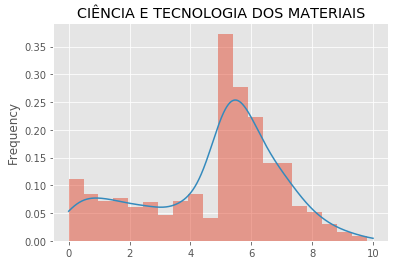

In [44]:
for disciplina in disciplinas:
    fig= plt.figure()
    ax= fig.gca()
#     plt.style.use('ggplot')
    notas = df[df['nome'] == disciplina].media_final
    notas.plot.hist(ax=ax,density=True, bins=20, alpha=.5)
    x= st.kde.gaussian_kde(notas)
    #x.evaluate(data)
    print(x.covariance)
    x1= np.linspace(0,10,1000)
    y= x.pdf(x1)
    plt.title(disciplina)
    plt.plot(x1,y)
    plt.savefig('plot'+str(disciplina)+'.png')

Media: 2.9549604320768026
Desvio: 0.0815811937932688
Amplitude: 4.49965582877455
Media: 2.9549492900279772
Desvio: 0.08161760958839806
Amplitude: 4.499655828774549


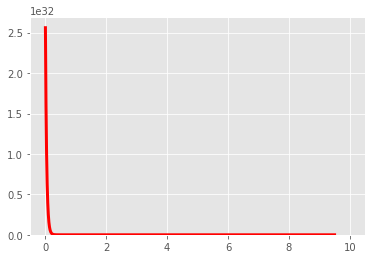

In [42]:
from pylab import *
from scipy.optimize import curve_fit, least_squares

def gauss(x,mu,sigma,A):
    return A*exp(-(x-mu)*2/2/sigma*2)

def bimodal(x0,x):
    return gauss(x,x0[0],x0[1],x0[2])+gauss(x,x0[3],x0[4],x0[5])

def bimodal_fit(x0,x,y):
    return gauss(x,x0[0],x0[1],x0[2])+gauss(x,x0[3],x0[4],x0[5])-y

notas = df[df['nome'] == 'CÁLCULO II'].media_final
y,x,_= hist(notas,20,alpha=.3,density=True)
x=x[:-1]
x0 = [np.mean(x),np.std(y),np.mean(y),np.mean(x),np.std(y),np.mean(y)]
X0= [1,2,1,6,2,1]
res_robust= least_squares(bimodal_fit,x0,loss='soft_l1',f_scale=1000,args=(x,y))
for a,b in zip(['Media','Desvio','Amplitude']*2,res_robust.x):
    print('{}: {}'.format(a,b))
x1= np.linspace(np.min(x),np.max(x),1000)
plt.plot(x1,bimodal(res_robust.x,x1),color='red',lw=3,label='model')